In [58]:
# Function to check whether there
# exists a Hamiltonian Path or not
def Hamiltonian_path(adj, N):

    dp = [[False for i in range(1 << N)]
          for j in range(N)]

    # Set all dp[i][(1 << i)] to
    # true
    for i in range(N):
        dp[i][1 << i] = True

    # Iterate over each subset
    # of nodes
    for i in range(1 << N):
        for j in range(N):

            # If the jth nodes is included
            # in the current subset
            if ((i & (1 << j)) != 0):

                # Find K, neighbour of j
                # also present in the
                # current subset
                for k in range(N):
                    if ((i & (1 << k)) != 0 and
                        adj[k][j] == 1 and
                        j != k and
                            dp[k][i ^ (1 << j)]):

                        # Update dp[j][i]
                        # to true
                        dp[j][i] = True
                        break

    # Traverse the vertices
    for i in range(N):

        # Hamiltonian Path exists
        if (dp[i][(1 << N) - 1]):
            return True

    # Otherwise, return false
    return False

In [59]:
# Python program for solution of
# hamiltonian cycle problem

class Graph():
    def __init__(self, vertices):
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.V = vertices

    ''' Check if this vertex is an adjacent vertex 
        of the previously added vertex and is not 
        included in the path earlier '''

    def isSafe(self, v, pos, path):
        # Check if current vertex and last vertex
        # in path are adjacent
        if self.graph[path[pos-1]][v] == 0:
            return False

        # Check if current vertex not already in path
        for vertex in path:
            if vertex == v:
                return False

        return True

    # A recursive utility function to solve
    # hamiltonian cycle problem
    def hamCycleUtil(self, path, pos):

        # base case: if all vertices are
        # included in the path
        if pos == self.V:
            # Last vertex must be adjacent to the
            # first vertex in path to make a cycle
            if self.graph[path[pos-1]][path[0]] == 1:
                return True
            else:
                return False

        # Try different vertices as a next candidate
        # in Hamiltonian Cycle. We don't try for 0 as
        # we included 0 as starting point in hamCycle()
        for v in range(1, self.V):

            if self.isSafe(v, pos, path) == True:

                path[pos] = v

                if self.hamCycleUtil(path, pos+1) == True:
                    return True

                # Remove current vertex if it doesn't
                # lead to a solution
                path[pos] = -1

        return False

    def hamCycle(self):
        path = [-1] * self.V

        ''' Let us put vertex 0 as the first vertex 
            in the path. If there is a Hamiltonian Cycle, 
            then the path can be started from any point 
            of the cycle as the graph is undirected '''
        path[0] = 0

        if self.hamCycleUtil(path, 1) == False:
            print("Solution does not exist\n")
            return False

        self.printSolution(path)
        return True

    def printSolution(self, path):
        print("Solution Exists: Following",
              "is one Hamiltonian Cycle")
        for vertex in path:
            print(vertex, end=" ")
        print(path[0], "\n")

In [60]:
import random

graph_dict = {16: [], 18: [], 20: []}
vertices_list = [16, 18, 20]
def generate_random_graph(vertex_count):
    graph = [[0 for _ in range(vertex_count)] for _ in range(vertex_count)]
    for i in range(vertex_count):
        for j in range(i + 1, vertex_count):
            edge = random.choice([0, 1])
            graph[i][j] = edge
            graph[j][i] = edge
    return graph

# write into txt file
def write_to_file(graph, N):
    filename = f'graph_{N}.txt'
    with open(filename, 'w') as f:
        for i in range(N):
            for j in range(N):
                f.write(f'{graph[i][j]} ')
            f.write('\n')

# NOTE: run this only once to generate the graphs to prevent overwriting
# # for graph in dict, write to file in txt
# for N in vertices_list:
#     graph = generate_random_graph(N)
#     write_to_file(graph, N)

def read_from_file(N):
    filename = f'graph_{N}.txt'
    graph = []
    with open(filename, 'r') as f:
        for line in f:
            graph.append([int(x) for x in line.split()])
    return graph

for N in vertices_list:
    graph = read_from_file(N)
    graph_dict[N] = graph
    print(graph_dict[N])

[[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]]
[[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [61]:
# for graph in graph dict, find hamiltonian path
for N, graph in graph_dict.items():
    print(f'N = {N}')
    print(graph)
    print(Hamiltonian_path(graph, N))
    
# for graph in graph dict, find hamiltonian path using backtracking
for N, graph in graph_dict.items():
    print(f'N = {N}')
    print(graph)
    g1 = Graph(N)
    g1.graph = graph
    g1.hamCycle()

N = 16
[[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]]
True
N = 18
[[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 0

In [62]:
import time
from memory_profiler import memory_usage

def test_algorithms(graph, N):
    # Testing Dynamic Programming
    start_time = time.time()
    mem_usage_dp = memory_usage((Hamiltonian_path, (graph, N)))
    time_taken_dp = time.time() - start_time

    # Testing Backtracking
    start_time = time.time()
    g1 = Graph(N)
    g1.graph = graph
    g1.hamCycle()
    mem_usage_bt = memory_usage((g1.hamCycle, ()))
    time_taken_bt = time.time() - start_time

    return (mem_usage_dp, time_taken_dp), (mem_usage_bt, time_taken_bt)

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 7 5 6 9 8 10 13 15 14 12 11 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 7 5 6 9 8 10 13 15 14 12 11 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 7 5 6 9 8 10 13 15 14 12 11 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 7 5 6 9 8 10 13 15 14 12 11 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 7 5 6 9 8 10 13 15 14 12 11 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 3 2 4 5 7 6 8 10 11 9 14 13 17 16 15 12 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 3 2 4 5 7 6 8 10 11 9 14 13 17 16 15 12 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 3 2 4 5 7 6 8 10 11 9 14 13 17 16 15 12 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 3 2 4 5 7 6 8 10 11 9 14 13 17 16 15 12 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 3 2 4 5 7 6 8 10 11 9 14 13 17 16 15 12 0 

Solution Exists: Following is 

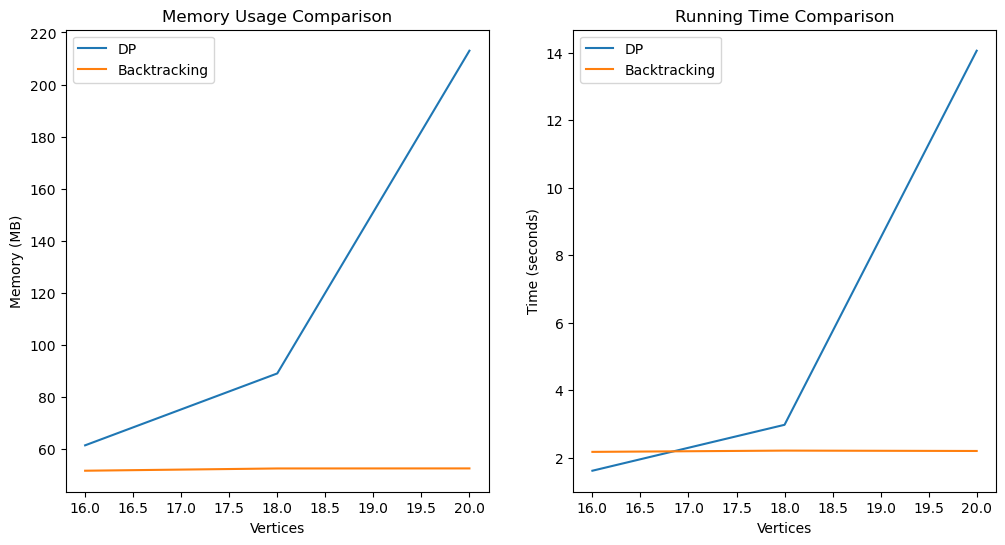

DP
N = 16: time = 1.6108224391937256, memory = 61.39453125
N = 18: time = 2.972266435623169, memory = 89.01171875
N = 20: time = 14.064238548278809, memory = 212.99609375
Backtracking
N = 16: time = 2.1695237159729004, memory = 51.63671875
N = 18: time = 2.2072129249572754, memory = 52.50390625
N = 20: time = 2.1962532997131348, memory = 52.5234375


In [63]:
import matplotlib.pyplot as plt
vertices = [16, 18, 20]
res_time_dp = []
res_mem_dp = []
res_time_bt = []
res_mem_bt = []

for N, graph in graph_dict.items():
    (mem_usage_dp, time_taken_dp), (mem_usage_bt, time_taken_bt) = test_algorithms(graph, N)
    res_time_dp.append(time_taken_dp)
    res_mem_dp.append(max(mem_usage_dp))
    res_time_bt.append(time_taken_bt)
    res_mem_bt.append(max(mem_usage_bt))
    
# plot into a graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vertices, res_mem_dp, label='DP')
plt.plot(vertices, res_mem_bt, label='Backtracking')
plt.title('Memory Usage Comparison')
plt.xlabel('Vertices')
plt.ylabel('Memory (MB)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vertices, res_time_dp, label='DP')
plt.plot(vertices, res_time_bt, label='Backtracking')
plt.title('Running Time Comparison')
plt.xlabel('Vertices')
plt.ylabel('Time (seconds)')
plt.legend()

plt.show()

# print out the results
print('DP')
for i in range(len(vertices)):
    print(f'N = {vertices[i]}: time = {res_time_dp[i]}, memory = {res_mem_dp[i]}')
print('Backtracking')
for i in range(len(vertices)):
    print(f'N = {vertices[i]}: time = {res_time_bt[i]}, memory = {res_mem_bt[i]}')